In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import openturns as ot
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc, rcParams, style
#rcParams['text.usetex'] = True
#rc('font', **{'family': 'Times'})
#rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

## Univariate quadratures

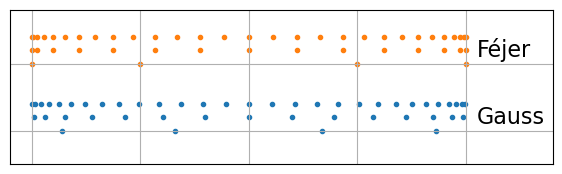

In [3]:
n = 4
method = 2
gauss_legendre_nodes_0 = np.array(ot.GaussLegendre([n]).getNodes())
gauss_legendre_nodes_0 = gauss_legendre_nodes_0 * 2 - 1
fejer_nodes_0 = ot.FejerAlgorithm([n], method).getNodes()
#
n1 = 15
gauss_legendre_nodes_1 = np.array(ot.GaussLegendre([n1]).getNodes())
gauss_legendre_nodes_1 = gauss_legendre_nodes_1 * 2 - 1
fejer_nodes_1 = ot.FejerAlgorithm([n1], method).getNodes()
#
n2 = 29
gauss_legendre_nodes_2 = np.array(ot.GaussLegendre([n2]).getNodes())
gauss_legendre_nodes_2 = gauss_legendre_nodes_2 * 2 - 1
fejer_nodes_2 = ot.FejerAlgorithm([n2], method).getNodes()


plt.figure(figsize=(7, 2))
plt.scatter(gauss_legendre_nodes_0, [0] * n, marker=".", color="C0")
plt.scatter(gauss_legendre_nodes_1, [0.02] * n1, marker=".", color="C0")
plt.scatter(gauss_legendre_nodes_2, [0.04] * n2, marker=".", color="C0")

plt.scatter(fejer_nodes_0, [0.1] * n, marker=".", color="C1")
plt.scatter(fejer_nodes_1, [0.12] * n1, marker=".", color="C1")
plt.scatter(fejer_nodes_2, [0.14] * n2, marker=".", color="C1")


plt.text(1.05, 0.01, "Gauss")
plt.text(1.05, 0.11, "Féjer")
plt.xlim((-1.1, 1.4))
plt.ylim((-0.05, 0.18))

plt.tick_params(
    axis='both',
    which='both', 
    bottom=False,
    left=False,
    labelleft=False,
    top=False, 
    labelbottom=False
    )
plt.grid(True)
plt.savefig("figures/univariate_quadratures.png", dpi=300, bbox_inches='tight', transparent=True);

In [4]:
from matplotlib.ticker import MaxNLocator

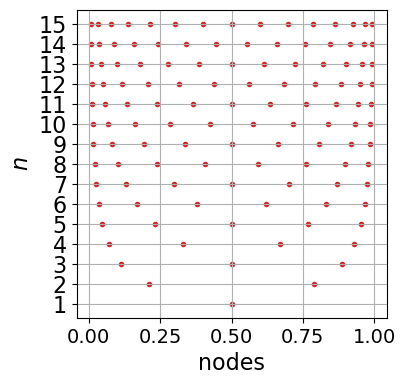

In [5]:
plt.figure(figsize=(4, 4))
for n in range(1, 16):
    gauss_nodes = ot.GaussLegendre([n]).getNodes()
    plt.scatter(gauss_nodes, [n] * n, marker=".", color="C3")
plt.yticks(range(1, 16))
plt.ylabel("$n$")
plt.xlabel("nodes")
plt.grid(True)
plt.savefig("figures/univariate_gauss_legendre.png", dpi=300, bbox_inches='tight', transparent=True);

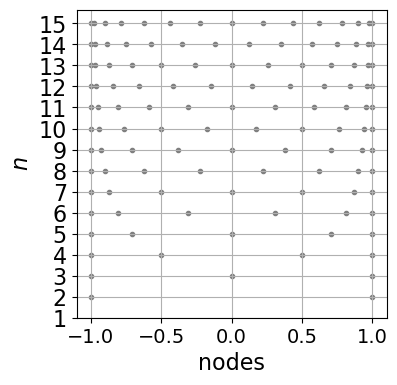

In [6]:
plt.figure(figsize=(4, 4))
for n in range(1, 16):
    fejer_nodes = ot.FejerAlgorithm([n], method).getNodes()
    plt.scatter(fejer_nodes, [n] * n, marker=".", color="C7")
plt.yticks(range(1, 16))
plt.ylabel("$n$")
plt.xlabel("nodes")
plt.grid(True)
plt.savefig("figures/univariate_clenshaw_curtis.png", dpi=300, bbox_inches='tight', transparent=True);

## Mutivariate quadratures

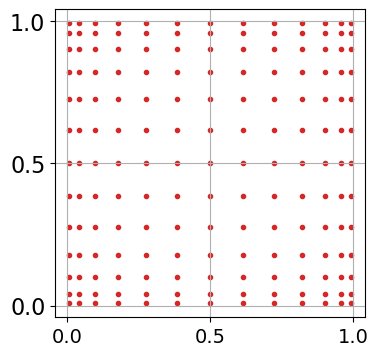

In [7]:
n  = 13
experiment = ot.GaussProductExperiment(ot.Uniform(0.0, 1.0), [n])
multivariate_experiment = ot.TensorProductExperiment([experiment] * 2)
nodes, weights = multivariate_experiment.generateWithWeights()
plt.figure(figsize=(4, 4))
plt.scatter(nodes[:, 0], nodes[:, 1], marker=".", color="C3")
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.grid(True);

In [8]:
multivariate_experiment = ot.SmolyakExperiment([experiment] * 2, 4)
nodes, weights = multivariate_experiment.generateWithWeights()
plt.figure(figsize=(4, 4))
plt.scatter(nodes[:, 0], nodes[:, 1], marker=".")
plt.xticks([0, 0.5, 1])
plt.yticks([0, 0.5, 1])
plt.grid(True);

AttributeError: module 'openturns' has no attribute 'SmolyakExperiment'